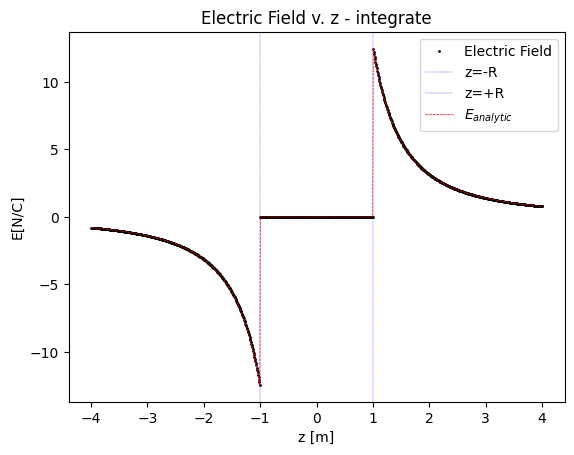

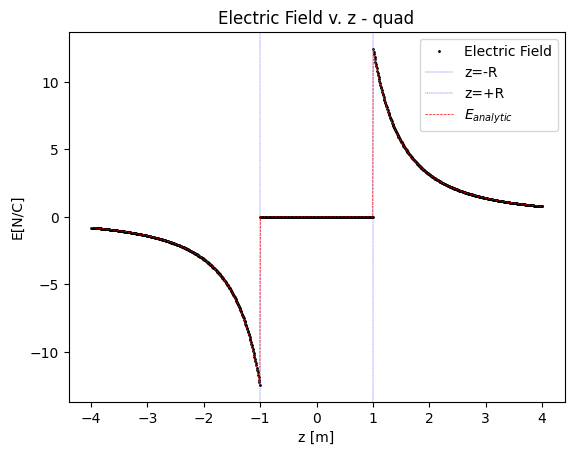

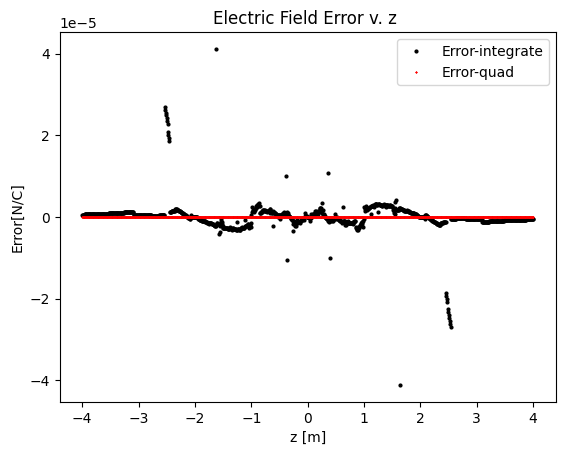

In [149]:

#################Problem 1#################
###########################################

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad 


#Parts of the code in this assignment were adapted from the lecture notes.
def integrate(fun, a,b,tol):
    #print('calling function from ',a,b)
    x=np.linspace(a,b,5)
    dx=x[1]-x[0]
    y=fun(x)
    #do the 3-point integral
    i1=(y[0]+4*y[2]+y[4])/3*(2*dx)
    i2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3*dx
    myerr=np.abs(i1-i2)
    if myerr<tol:
        return i2
    else:
        mid=(a+b)/2
        int1=integrate(fun,a,mid,tol/2)
        int2=integrate(fun, mid,b,tol/2)
        return int1+int2
    



zs = np.linspace(-4,4, 1000)#z domain to plot
E1=[]#scipy integ E values
E2=[]#integrate E values
E3=[]#analytical solution
Er1=[]#quad err
Er2=[]#integrate err


def Ef(z,t):
    return 2*np.pi*(z-np.cos(t))*(1+z**2-2*z*np.cos(t))**(-3/2)*np.sin(t)
    #error analysis
def Eana(z):
    if z>1 or z<-1:
        return 4*np.pi*z/(z**2*np.abs(z))
    else:
        return 0
        
        
for i in zs:
    qi=lambda x: Ef(i, x)
    q1=quad(qi,0,np.pi)
    q2=integrate(qi,0,np.pi,1e-4)
    q3=Eana(i)
    mer1=q1[0]-q3
    mer2=q2-q3
    E1.append(q1[0])
    E2.append(q2)
    E3.append(q3)
    Er1.append(mer1)
    Er2.append(mer2)


zr = 1
#z=R=1    
#integrate plot E v. z
plt.plot(zs,E2, 'ok', ms=1,label='Electric Field')
plt.axvline(-zr,c='b', ls = '--',lw =.25, label='z=-R')
plt.axvline(zr,c='b', ls = '--',lw =.25, label='z=+R')
plt.plot(zs,E3, 'r', ls = '--',lw =.5,label='$E_{analytic}$')
plt.xlabel('z [m]')
plt.ylabel('E[N/C]')
plt.title('Electric Field v. z - integrate')
plt.legend()
plt.show()
    
#quad plot E v. z
plt.plot(zs,E1, 'ok', ms=1,label='Electric Field')
plt.axvline(-zr,c='b', ls = '--',lw =.25, label='z=-R')
plt.axvline(zr,c='b', ls = '--',lw =.25, label='z=+R')
plt.plot(zs,E3, 'r', ls = '--',lw =.5,label='$E_{analytic}$')
plt.xlabel('z [m]')
plt.ylabel('E[N/C]')
plt.title('Electric Field v. z - quad')
plt.legend()
plt.show()

#error quad plot E v. z
plt.plot(zs,Er2, 'ok', ms=2,label='Error-integrate')
plt.plot(zs,Er1, 'xr', ms=1,label='Error-quad')
plt.xlabel('z [m]')
plt.ylabel('Error[N/C]')
plt.title('Electric Field Error v. z ')
plt.legend()
plt.show()





In [150]:

#################Problem 2#################
###########################################
import numpy as np
def lorentz(x): #Lorentzian
    return 1/(1+x**2)

#original integrate
def integrate(fun, a,b,tol):
    #print('calling function from ',a,b)
    x=np.linspace(a,b,5)
    dx=x[1]-x[0]
    y=fun(x)
    integrate.counted+=5
    #do the 3-point integral
    i1=(y[0]+4*y[2]+y[4])/3*(2*dx)
    i2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3*dx
    myerr=np.abs(i1-i2)
    if myerr<tol:
        return i2
    else:
        mid=(a+b)/2
        int1=integrate(fun,a,mid,tol/2)
        int2=integrate(fun, mid,b,tol/2)
        return int1+int2
    
#adaptive integrate
def integrate_adaptive(fun, a,b,tol,extra=None):
    x=np.linspace(a,b,5)
    dx=x[1]-x[0]
    if extra==None:
        y=fun(x)
        integrate_adaptive.mcounted+=5#first call upon extra=None
    else:
        y=[extra[0],fun(x[1]),extra[1],fun(x[3]),extra[2]]
        integrate_adaptive.mcounted+=2
    #do the 3-point integral
    i1=(y[0]+4*y[2]+y[4])/3*(2*dx)
    i2=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])/3*dx
    myerr=np.abs(i1-i2)
    if myerr<tol:
        return i2 
    else:
        mid=(a+b)/2
        int1=integrate_adaptive(fun,a,mid,tol/2,extra=[y[0],y[1],y[2]])
        int2=integrate_adaptive(fun, mid,b,tol/2,extra=[y[2],y[3],y[4]])
        #counted+=2#two more calls
        return int1+int2

funs = {"cosh": np.cosh, "exponential": np.exp, "Lorentzian": lorentz}

for i in funs:
    fun=funs[i]
    func=i
    integrate.counted=0#lazy calls
    integriL=integrate(fun, -5,5, 1e-4)

    integrate_adaptive.mcounted=0#adaptive calls
    integriA=integrate_adaptive(fun, -5,5, 1e-4)
    print('Function:',format(func))
    print('Integral lazy:',integriL)
    print('Integral adaptive:',integriA)

    print('Integral lazy {}'.format(func)+' calls:', integrate.counted)
    print('Integral adaptive {}'.format(func)+' calls:', integrate_adaptive.mcounted)
    print('\n')



Function: cosh
Integral lazy: 148.40642382641823
Integral adaptive: 148.40642382641823
Integral lazy cosh calls: 555
Integral adaptive cosh calls: 225


Function: exponential
Integral lazy: 148.40642300735928
Integral adaptive: 148.40642300735928
Integral lazy exponential calls: 455
Integral adaptive exponential calls: 185


Function: Lorentzian
Integral lazy: 2.7468037248859702
Integral adaptive: 2.7468037248859702
Integral lazy Lorentzian calls: 275
Integral adaptive Lorentzian calls: 113




Coefficients needed: 8


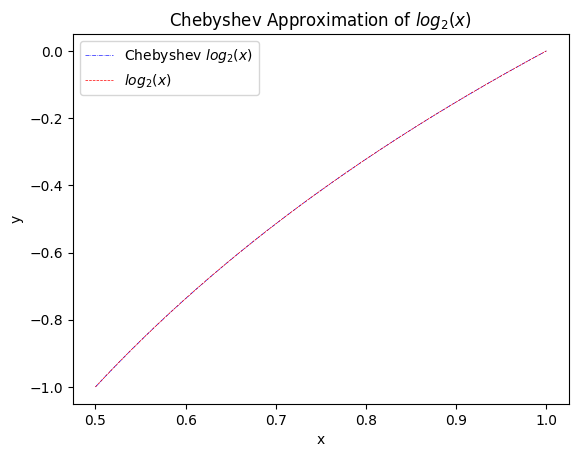

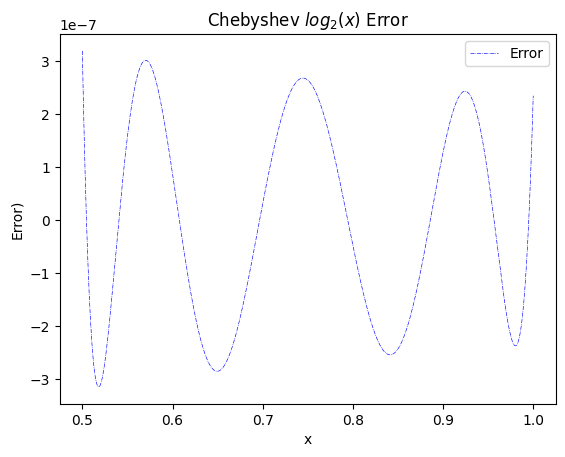

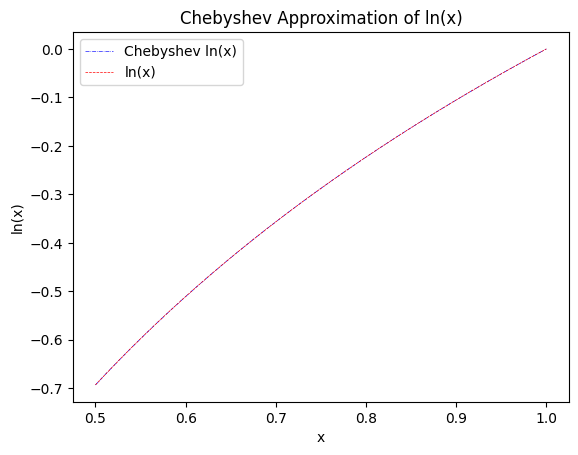

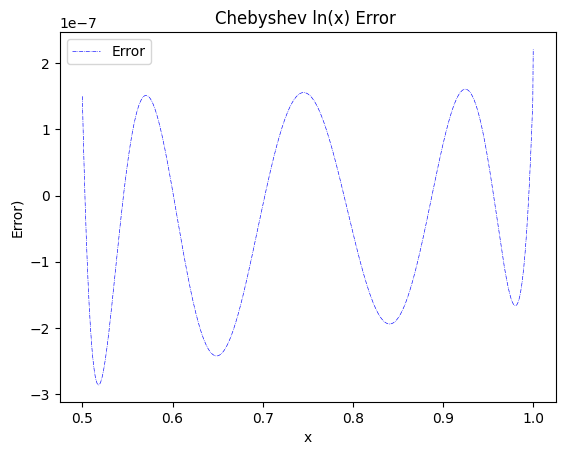

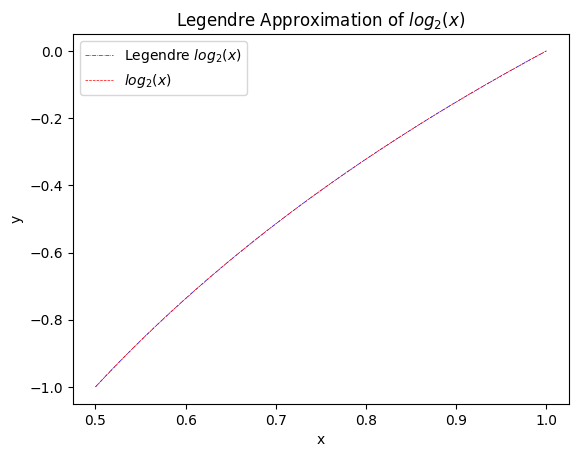

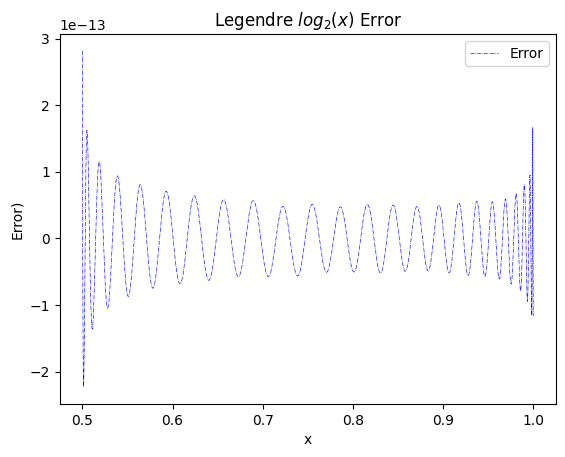

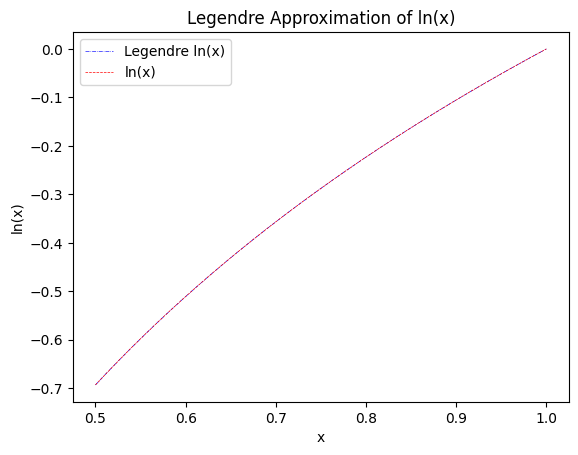

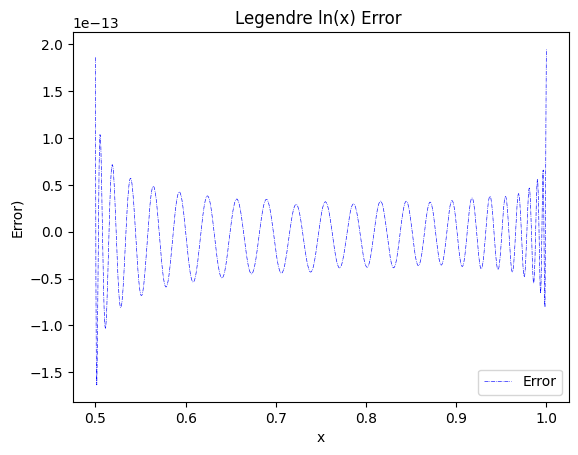

In [151]:

#################Problem 3#################
###########################################
import numpy as np
from matplotlib import pyplot as plt

chefit = np.polynomial.chebyshev.Chebyshev.fit

lefit = np.polynomial.legendre.legfit
leval = np.polynomial.legendre.legval


def chebscalc(order,xmin, xmax,tol):
    x=np.linspace(xmin,xmax,1001)#[0.5,1]
    y=np.log2(x0)#evaluate log2x 
    myche0=chefit(x,y,cord,domain=(xmin,xmax))
    myche=myche0.trim(tol)#trim data set based on specified tol
    cheresult=myche(x)#evaluated generated series
    return myche, cheresult

cord=100#cheb order
xmin=0.5#lower bound
xmax=1#upper bound 
tol=1e-6#tolerance
x=np.linspace(xmin,xmax,1001)#[0.5,1]

chebs=chebscalc(cord,xmin,xmax,tol)
print('Coefficients needed:',len(chebs[0]))


# #Plot Cheb results
plt.plot(x,chebs[1], 'b', ls = '-.',lw =.45,label='Chebyshev $log_2(x)$')
plt.plot(x,np.log2(x), 'r', ls = '--',lw =.5,label='$log_2(x)$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Chebyshev Approximation of $log_2(x)$ ')
plt.legend()
plt.show()

plt.plot(x,-np.log2(x)+chebs[1], 'b', ls = '-.',lw =.45,label='Error')
plt.xlabel('x')
plt.ylabel('Error)')
plt.title('Chebyshev $log_2(x)$ Error ')
plt.legend()
plt.show()

####natural log calculations
def mylog2(x, chebb):
    manti,expo=np.frexp(x)#decompose x into mantissa and exponent
    emanti,eexpo=np.frexp(np.e)#decompose e into mantissa and exponent
    logx=chebb(manti)+expo#evalaute logx based on trimmed cheb
    loge=chebb(emanti)+eexpo#evaluate loge based on trimmed cheb
    lon=logx/loge#compute natural log
    cherr=lon-np.log(x)#error compared to inbuilt lnx
    return lon,cherr

myx=9
mylog2(myx,chebs[0])

# xs=np.linspace(np.e**-10, np.e**10,1001)
xs=x
lnxs=mylog2(xs,chebs[0])
#Plot lnx results

plt.plot(xs,lnxs[0], 'b', ls = '-.',lw =.45,label='Chebyshev ln(x)')
plt.plot(xs,np.log(xs), 'r', ls = '--',lw =.5,label='ln(x)')
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.title('Chebyshev Approximation of ln(x)')
plt.legend()
plt.show()

plt.plot(xs,lnxs[1], 'b', ls = '-.',lw =.45,label='Error')
plt.xlabel('x')
plt.ylabel('Error)')
plt.title('Chebyshev ln(x) Error ')
plt.legend()
plt.show()

######################################3
#Legendre fits

def legscalc(order,xmin, xmax,tol):
    x=np.linspace(xmin,xmax,1001)#[0.5,1]
    y=np.log2(x0)#evaluate log2x 
    myleg=lefit(x,y,cord)
    legresult=leval(x,myleg)#evaluated generated series
    return myleg, legresult

cord=100#cheb order
xmin=0.5#lower bound
xmax=1#upper bound 
tol=1e-6#tolerance
legs=legscalc(cord,xmin,xmax,tol)
# print('Coefficients needed:',len(chebs[0]))


#Plot Legendre results
plt.plot(x,legs[1], 'b', ls = '-.',lw =.45,label='Legendre $log_2(x)$')
plt.plot(x,np.log2(x), 'r', ls = '--',lw =.5,label='$log_2(x)$')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Legendre Approximation of $log_2(x)$ ')
plt.legend()
plt.show()

plt.plot(xs,-np.log2(x)+legs[1], 'b', ls = '-.',lw =.45,label='Error')
plt.xlabel('x')
plt.ylabel('Error)')
plt.title('Legendre $log_2(x)$ Error ')
plt.legend()
plt.show()

####natural log calculations
def mylog2leg(x, legss):
    manti,expo=np.frexp(x)#decompose x into mantissa and exponent
    emanti,eexpo=np.frexp(np.e)#decompose e into mantissa and exponent
    logx=leval(manti,legss)+expo#evalaute logx based on trimmed cheb
    loge=leval(emanti,legss)+eexpo#evaluate loge based on trimmed cheb
    lon=logx/loge#compute natural log
    cherr=lon-np.log(x)#error compared to inbuilt lnx
    return lon,cherr

myx=9
mylog2leg(myx,legs[0])

# xs=np.linspace(np.e**-10, np.e**10,1001)
xs=x
lnxs=mylog2leg(xs,legs[0])
#Plot lnx results

plt.plot(xs,lnxs[0], 'b', ls = '-.',lw =.45,label='Legendre ln(x)')
plt.plot(xs,np.log(xs), 'r', ls = '--',lw =.5,label='ln(x)')
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.title('Legendre Approximation of ln(x)')
plt.legend()
plt.show()

plt.plot(xs,lnxs[1], 'b', ls = '-.',lw =.45,label='Error')
plt.xlabel('x')
plt.ylabel('Error)')
plt.title('Legendre ln(x) Error ')
plt.legend()
plt.show()

